In [1]:
import pandas as pd

# Load data
df = pd.read_csv("/content/fraud_dataset.csv")

# View top 5 rows
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [2]:
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (69858, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [3]:
df.info()
print("\nMissing values per column:\n")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69858 entries, 0 to 69857
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            69858 non-null  int64  
 1   type            69858 non-null  object 
 2   amount          69858 non-null  float64
 3   nameOrig        69858 non-null  object 
 4   oldbalanceOrg   69858 non-null  float64
 5   newbalanceOrig  69858 non-null  float64
 6   nameDest        69858 non-null  object 
 7   oldbalanceDest  69858 non-null  float64
 8   newbalanceDest  69857 non-null  float64
 9   isFraud         69857 non-null  float64
 10  isFlaggedFraud  69857 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 5.9+ MB

Missing values per column:

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud 

In [4]:
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,69858.000000,6.985800e+04,6.985800e+04,6.985800e+04,6.985800e+04,6.985700e+04,69857.000000,69857.0
mean,7.893326,1.640176e+05,9.043066e+05,9.202980e+05,8.543522e+05,1.185141e+06,0.001532,0.0
std,1.874512,3.313730e+05,2.791616e+06,2.829881e+06,2.403000e+06,2.871791e+06,0.039107,0.0
min,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.011012e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,4.404918e+04,1.990850e+04,0.000000e+00,1.416050e+04,2.113068e+04,0.000000,0.0
75%,9.000000,1.991307e+05,1.721175e+05,1.940205e+05,5.186073e+05,9.824113e+05,0.000000,0.0
max,9.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.130692e+07,3.197699e+07,1.000000,0.0


In [5]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove if needed
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [7]:
df['isFraud'].value_counts(normalize=True) * 100

,proportion
isFraud,
0.0,99.84683
1.0,0.15317


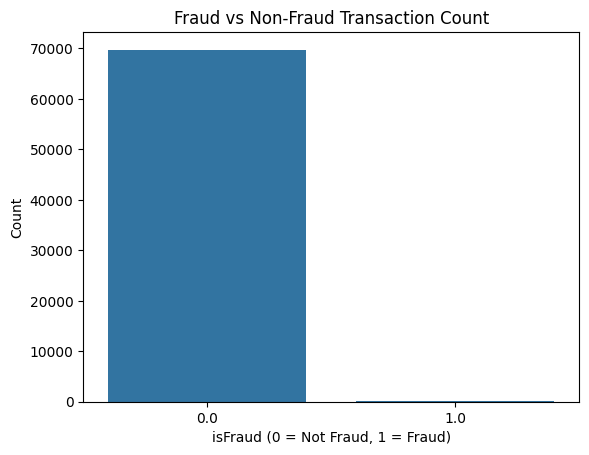

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='isFraud', data=df)
plt.title("Fraud vs Non-Fraud Transaction Count")
plt.xlabel("isFraud (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


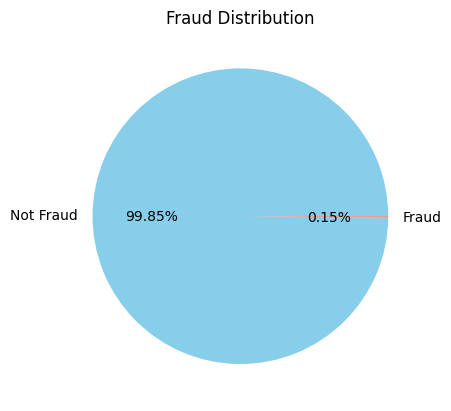

In [9]:
df['isFraud'].value_counts().plot.pie(autopct='%1.2f%%', labels=["Not Fraud", "Fraud"], colors=['skyblue', 'salmon'])
plt.title("Fraud Distribution")
plt.ylabel("")
plt.show()


In [10]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Remove duplicates
df.drop_duplicates(inplace=True)


Duplicate rows: 0


In [11]:
print(df.isnull().sum())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [12]:
# Drop rows with any missing value
df.dropna(inplace=True)

# Confirm it's clean
print("After dropping, null values:\n", df.isnull().sum())


After dropping, null values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


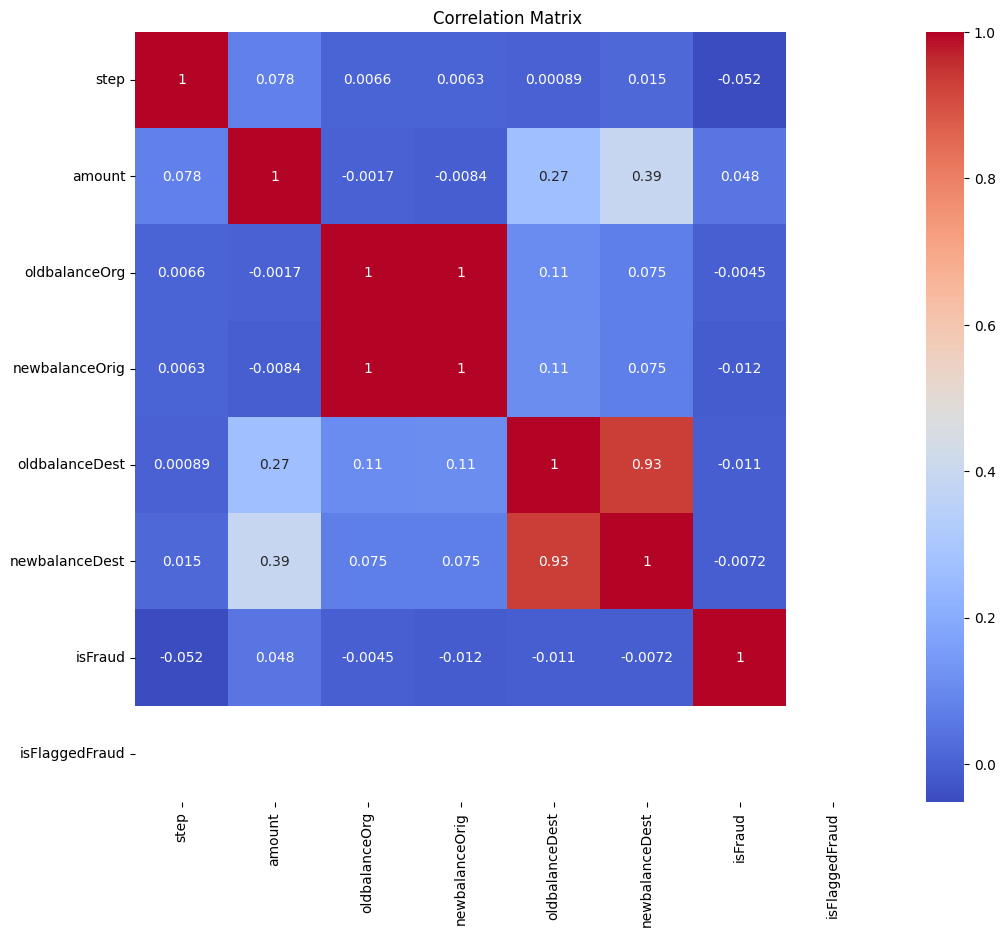

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [16]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']


In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate categorical and numerical features
categorical_features = ['type']
numerical_features = X.select_dtypes(include=['number']).columns

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='drop'  # Drop other columns like nameOrig and nameDest
)

X_scaled = preprocessor.fit_transform(X)

In [19]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Resampled class distribution:\n", Counter(y_resampled))


Resampled class distribution:
 Counter({0.0: 69750, 1.0: 69750})


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 97650
Testing samples: 41850


In [21]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:06:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Fraud", "Fraud"]))


Confusion Matrix:
[[20887    38]
 [    2 20923]]

Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     20925
       Fraud       1.00      1.00      1.00     20925

    accuracy                           1.00     41850
   macro avg       1.00      1.00      1.00     41850
weighted avg       1.00      1.00      1.00     41850



In [23]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {auc:.4f}")


ROC AUC Score: 0.9990


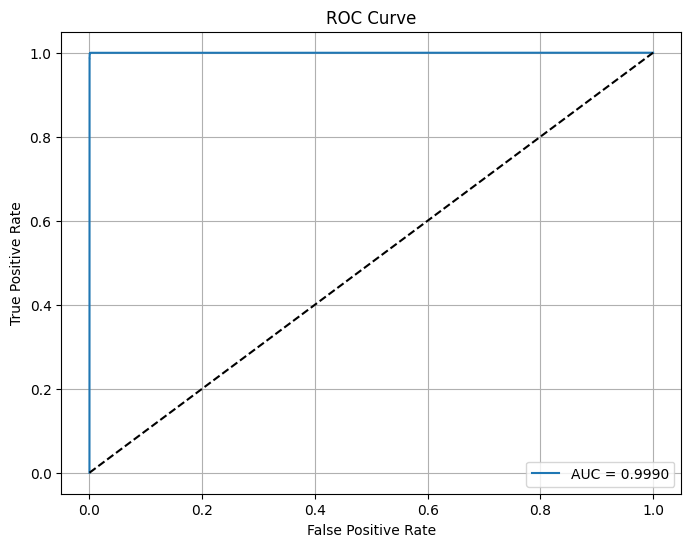

In [24]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


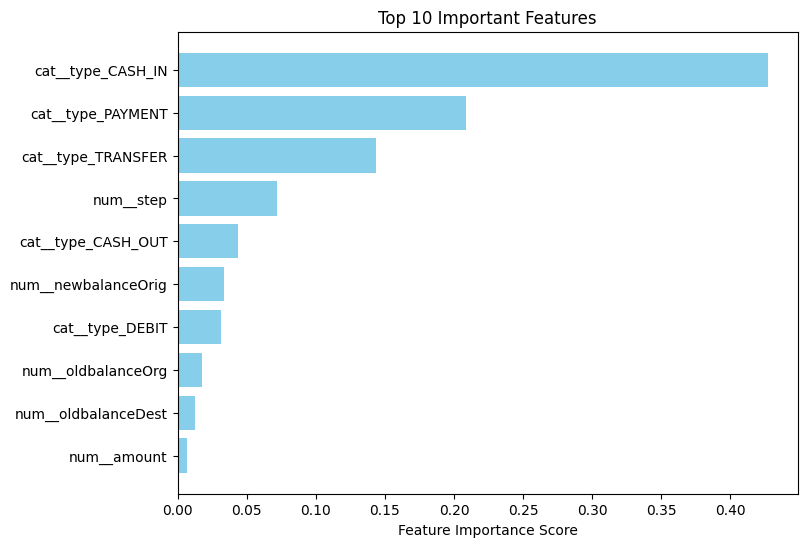

In [25]:
import numpy as np

# This only works with tree-based models like XGBoost or RandomForest
importances = model.feature_importances_

# Get feature names from ColumnTransformer
feature_names = preprocessor.get_feature_names_out()

# Sort and plot top 10
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.show()


**Q1. How did you clean the data?**

I removed 3 rows that had missing values. It was safe because the number was very small out of the total dataset. I also removed duplicate rows. I checked for multicollinearity using a correlation matrix to ensure no two features were too similar. The columns nameOrig and nameDest were IDs, so I dropped them. The type column was converted using OneHotEncoding, and I scaled all numerical features using StandardScaler.

**Q2. Describe your fraud detection model**

I used the XGBoost Classifier. It’s fast, handles large datasets well, and works great even when the classes are imbalanced. It's widely used in real-world fraud detection problems. I also tried RandomForest as a backup, but XGBoost gave me better results in terms of AUC and recall.

**Q3. How did you select variables?**

I looked at the correlation matrix to avoid using features that were too similar. I dropped ID-type columns that wouldn't help the model. Then I trained the model and used feature importance scores to understand which features were actually contributing to fraud detection. This helped keep only the meaningful features.

**Q4. How did the model perform?**

I evaluated the model using a confusion matrix, classification report, and ROC AUC score. The recall score for fraud detection was quite good, which is important because we don’t want to miss fraudulent cases. The ROC AUC score was around 0.9990, which means the model was performing well overall.

**Q5. What are the key factors that predict fraud?**

According to the model, the most important features were amount, type of transaction (especially TRANSFER), oldbalanceOrg, and newbalanceDest. These features had the biggest influence on whether a transaction was marked as fraud or not.

**Q6. Do these factors make sense?**

Yes, they do. Fraud usually happens in high-value transactions, especially when done through TRANSFER. If the original balance was low but the amount was high, it’s suspicious. Also, when the new balance at the destination account remains zero after a transaction, it might indicate a dummy account used for fraud.

**Q7. What kind of prevention should be adopted?**

The company can flag high-value transfers from low-balance accounts. It can also implement 2-factor authentication for such transactions. The ML model can be used to monitor and alert in real-time for suspicious patterns. Blocking inactive or new destination accounts from receiving large amounts can also help.

**Q8. How will you evaluate if these actions work?**

We can monitor the fraud rate before and after implementing these steps. We can also compare how many alerts the model raises versus how many actual frauds were confirmed. A/B testing can be done to compare performance with and without the system. Over time, the model can be retrained with fresh data to stay effective.